In [11]:
import numpy as np
import pandas as pd
import os
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
%matplotlib inline

In [12]:
tokenize = TweetTokenizer().tokenize

In [2]:
print(os.listdir())
train = pd.read_json('train.json')
test = pd.read_json('test.json')

print(train.head())

ytrain = train['cuisine']
print(ytrain.head(5))

Id = test['id']
print(Id.head(5))

['submission3.csv', 'Cooking.ipynb', 'test.json', 'submission2.csv', 'test.json.zip', 'submissionSVM.csv', 'sample_submission.csv.zip', "What's_Cooking_SVM.ipynb", 'submission.csv', 'train.json', "What's_Cooking_SVM_2.ipynb", 'sample_submission.csv', 'Cooking-4.ipynb', 'train.json.zip', 'values.csv', '.ipynb_checkpoints', 'Cooking_blog.ipynb', 'Cooking-2.ipynb']
       cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...
0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object
0    18009
1    28583
2    41580
3    29752
4    35687
Name: id, dtype: int64


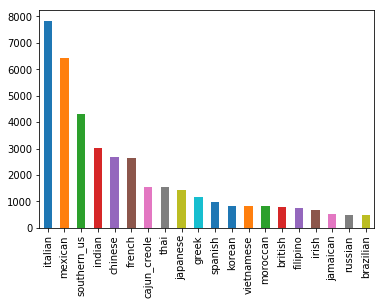

In [3]:
train['cuisine'].value_counts().plot(kind='bar')

In [4]:
def arraytotext(records):
    return [" ".join(record).lower() for record in records]

In [5]:
tfidf = TfidfVectorizer(binary=True)

In [8]:
train2 = train
print((train2['ingredients'][0]))
print(arraytotext(train2['ingredients'][0]))

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
['r o m a i n e   l e t t u c e', 'b l a c k   o l i v e s', 'g r a p e   t o m a t o e s', 'g a r l i c', 'p e p p e r', 'p u r p l e   o n i o n', 's e a s o n i n g', 'g a r b a n z o   b e a n s', 'f e t a   c h e e s e   c r u m b l e s']


In [15]:
train_features = tfidf.fit_transform(arraytotext(train['ingredients']))
test_features = tfidf.transform(arraytotext(test['ingredients']))

In [7]:
classifier = SVC(C=200, kernel='rbf', degree=3,gamma=1, \
                 coef0=1, shrinking=True,tol=0.001, probability=False,\
                 cache_size=200,class_weight=None, verbose=False,\
                 max_iter=-1,decision_function_shape=None,\
                 random_state=None)

In [8]:
model = OneVsRestClassifier(classifier)
scores = cross_val_score(classifier,train_features, ytrain, cv=2)
print ("Accuracy: %0.2f (+/- %0.2f)" % \
       (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.00)


In [9]:
model.fit(train_features, ytrain)

OneVsRestClassifier(estimator=SVC(C=200, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [10]:
predictions = model.predict(test_features)
print(predictions)

['irish' 'southern_us' 'italian' ... 'italian' 'southern_us' 'mexican']


In [12]:
submission = pd.DataFrame()
submission['id'] = Id
submission['cuisine'] = predictions
submission.to_csv('submissionSVM2.csv', index=False)
#Score: 0.821